# PROJEKT Uczenie Maszynowe Jakub B., Karol B.

Celem naszego projektu jest Klasyfikacja (K) projektu korzystając z: [Dane Airline Passenger Satisfaction (Kaggle)](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction) -- predykcja zadowolenia klientów linii lotniczych.

<a class="anchor" id="0.1"></a>
# **Spis treści**
- Importowanie bibliotek, wczytanie danych i ustalenie atrybutu dyskretnego jako celu.
- Przygotowanie danych (przekształcenia, eliminacja błędów, zmiana rozkładu klas).
- Zdefiniowanie nowych atrybutów.
- Wybranie algorytmu selekcji atrybutów.
- Wybranie algorytmu klasyfikacji.
- Ustalenie parametrów do strojenia (z uwzględnieniem rzadkich klas).
- Ustalenie procedur ocen.
- Podsumowanie.

#Importowanie bibliotek, wczytywanie danych i ustalenie atrybutu dyskretnego jako celu.

Importowanie bibliotek

In [1]:
import pandas as pd
import numpy as np
import csv
from google.colab import files
import io
import matplotlib.pyplot as plt

Wczytywanie danych, scalenie i ich wyświetlenie


In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

combined_df = pd.concat([test_df, train_df])
combined_df.to_csv("CombinedLab.csv", index=False)

combined_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


Ustalenie atrybutu dyskretnego jako celu

Jako cel klasyfikacji wybrano atrybut "satisfaction", który ma dwie klasy: "satisfied" i "neutral or dissatisfied".

#Przygotowanie danych (przekształcenia, eliminacja błędów, zmiana rozkładu klas)

- Wczytanie danych i dokonanie ich wstępnej analizy

Sprawdzenie liczby elementów i liczby kolumn w zbiorach przed usunięciem danych.

In [3]:
print("Liczba elementów w całym zbiorze wynosi: ", combined_df.shape[0])
print("Liczba kolumn w całym zbiorze wynosi: ", combined_df.shape[1])

Liczba elementów w całym zbiorze wynosi:  129880
Liczba kolumn w całym zbiorze wynosi:  25



Zmiana ewentualnie występujących "?" na wartości NaN.

In [4]:
combined_df = pd.read_csv('CombinedLab.csv' , na_values='?')

Sprawdzenie informacji o wartościach w zbiorze "combined_df".

In [5]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

Sprawdzenie informacji o kolumnach w zbiorze "combined_df".

In [6]:
combined_df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

W tym secie danych znajdują się wartości typu kategorialnych oraz typu numerycznych. Zaobserwowano, że wszystkie wartości numeryczne są typu "int64". Poniżej przedstawione są wartości typu kategorialnych.

In [7]:
categorical = [var for var in combined_df.columns if combined_df[var].dtype=='O']

print('W całym zbiorze znajduje się {} kategorialnych zmiennych \n'.format(len(categorical)))

print('Możemy wymienić takie wartości kategorialne jak:\n\n', categorical)

W całym zbiorze znajduje się 5 kategorialnych zmiennych 

Możemy wymienić takie wartości kategorialne jak:

 ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


In [8]:
combined_df.isnull().sum()

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


Można zaobserwować, że w tym secie danych występują puste pola w kolumnie "Arrival Delay in Minutes" w liczbie 393. Wartości te na potrzeby projektu zostały usunięte ze względu na dużą ilość danych).

In [9]:
combined_df = combined_df.dropna()

combined_unique_id = combined_df['id'].nunique()
print("Liczba unikalnych id w zbiorze treningowym wynosi: ", combined_unique_id)

print("Liczba kolumn w całym zbiorze wynosi: ", combined_df.shape[1])

combined_df = combined_df.drop(columns=["Unnamed: 0", "id"])
print("Liczba elementów w całym zbiorze wynosi: ", combined_df.shape[0])
print("Liczba kolumn w całym zbiorze wynosi: ", combined_df.shape[1])

Liczba unikalnych id w zbiorze treningowym wynosi:  129487
Liczba kolumn w całym zbiorze wynosi:  25
Liczba elementów w całym zbiorze wynosi:  129487
Liczba kolumn w całym zbiorze wynosi:  23


In [10]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129487 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129487 non-null  object 
 1   Customer Type                      129487 non-null  object 
 2   Age                                129487 non-null  int64  
 3   Type of Travel                     129487 non-null  object 
 4   Class                              129487 non-null  object 
 5   Flight Distance                    129487 non-null  int64  
 6   Inflight wifi service              129487 non-null  int64  
 7   Departure/Arrival time convenient  129487 non-null  int64  
 8   Ease of Online booking             129487 non-null  int64  
 9   Gate location                      129487 non-null  int64  
 10  Food and drink                     129487 non-null  int64  
 11  Online boarding                    129487 no

Można zaobserwować, że na początku liczba elementów w całym zbiorze wynosiła "129880" a po usunięciu pustych pól liczba elementów zmieniła się na "129487".

Sprawdzono również dane pod względem powtórzeń id. Nie znaleziono żadnych powtórzeń.

Utworzenie oraz zdefiniowanie nowych atrybutów: "avg_rating" roaz "avg_rating_services_on_board".

In [11]:
selected_columns = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
data_subset = combined_df[selected_columns].copy()
combined_df['avg_rating'] = data_subset[selected_columns].mean(axis=1)

sele_columns = ['Inflight wifi service', 'Food and drink', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Inflight service', 'Cleanliness']
data_subset = combined_df[selected_columns].copy()
combined_df['avg_rating_services_on_board'] = data_subset[selected_columns].mean(axis=1)

In [12]:
combined_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,avg_rating,avg_rating_services_on_board
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,2,5,5,50,44.0,satisfied,4.142857,4.142857
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,3,4,5,0,0.0,satisfied,3.428571,3.428571
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,1,3,2,2,2,0,0.0,neutral or dissatisfied,2.142857,2.142857
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,3,1,4,0,6.0,satisfied,1.785714,1.785714
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,4,2,4,0,20.0,satisfied,2.642857,2.642857


In [13]:
X = combined_df.drop(['satisfaction'], axis=1)

y = combined_df['satisfaction']

Podział danych na dane treningowe oraz testowe (0.20 oznacza, że cały plik został podzielony na 20% danych testowych a reszta na dane treningowe)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((103589, 24), (103589,), (25898, 24), (25898,))

In [16]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [17]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'avg_rating',
 'avg_rating_services_on_board']

Powyżej zostały wykonane takie operacje jak:
- sprawdzenie ilości wartości w zbiorze treningowym oraz testowym,
- sprawdzenie wartości kategorycznych i numerycznych.

#Kodowanie one-hot dla wartości atrybutów kategorialnych w zbiorze.

In [18]:
!pip install category-encoders
import category_encoders as ce

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.6 MB/s eta 0:00:00


In [19]:
X_train[categorical].isnull().sum()
X_train.isnull().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


Szybkie sprawdzenie czy wartości kategoryczne nie zawierają pustych pól.

In [20]:
encoder = ce.OneHotEncoder(cols=categorical)

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


In [21]:
X_train.head(10)

,Gender_1,Gender_2,Customer Type_1,Customer Type_2,Age,Type of Travel_1,Type of Travel_2,Class_1,Class_2,Class_3,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,avg_rating,avg_rating_services_on_board
41716,1,0,1,0,29,1,0,1,0,0,...,3,2,3,4,5,4,12,0.0,3.642857,3.642857
121071,0,1,1,0,43,0,1,0,1,0,...,5,5,5,3,5,2,0,0.0,3.571429,3.571429
43279,0,1,1,0,25,1,0,1,0,0,...,4,5,3,4,1,4,5,0.0,3.285714,3.285714
76578,0,1,1,0,33,1,0,1,0,0,...,2,4,1,3,2,5,15,15.0,3.214286,3.214286
61338,0,1,1,0,37,0,1,0,0,1,...,1,5,1,4,5,4,4,0.0,3.714286,3.714286
56557,0,1,1,0,30,0,1,0,1,0,...,1,2,3,2,4,3,13,10.0,2.785714,2.785714
90205,0,1,1,0,54,1,0,1,0,0,...,2,3,2,5,2,5,3,3.0,3.357143,3.357143
11554,0,1,1,0,59,0,1,1,0,0,...,1,1,1,2,1,1,14,19.0,2.285714,2.285714
49249,0,1,0,1,25,0,1,0,1,0,...,4,5,4,4,4,2,11,7.0,3.357143,3.357143
31349,0,1,1,0,18,0,1,0,1,0,...,4,1,2,2,3,1,0,0.0,1.785714,1.785714


In [22]:
X_test.head(10)

,Gender_1,Gender_2,Customer Type_1,Customer Type_2,Age,Type of Travel_1,Type of Travel_2,Class_1,Class_2,Class_3,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,avg_rating,avg_rating_services_on_board
43166,0,1,0,1,21,0,1,1,0,0,...,4,2,4,4,4,3,79,77.0,2.928571,2.928571
125242,0,1,1,0,32,0,1,0,1,0,...,2,2,2,1,3,5,0,12.0,3.500000,3.500000
28475,0,1,1,0,11,1,0,1,0,0,...,1,2,3,2,4,2,0,0.0,2.285714,2.285714
124206,0,1,1,0,63,1,0,1,0,0,...,2,3,2,5,2,4,0,0.0,3.357143,3.357143
39394,1,0,1,0,42,0,1,1,0,0,...,1,4,3,1,3,2,0,0.0,2.571429,2.571429
106841,0,1,0,1,33,0,1,0,1,0,...,5,3,4,4,4,2,3,0.0,2.642857,2.642857
97952,0,1,1,0,58,1,0,1,0,0,...,3,2,2,4,3,4,14,41.0,2.928571,2.928571
78524,1,0,0,1,16,0,1,1,0,0,...,1,2,4,1,3,3,33,30.0,3.000000,3.000000
57115,0,1,1,0,39,0,1,0,1,0,...,4,4,4,3,4,5,0,0.0,4.428571,4.428571
1909,0,1,1,0,31,0,1,0,1,0,...,5,5,4,5,5,4,0,0.0,3.714286,3.714286


In [23]:
X_train.shape, X_test.shape

((103589, 29), (25898, 29))

In [24]:
y_train.shape, y_test.shape


((103589,), (25898,))

Przygotowane zostały dane treningowe oraz testowe do budowania modelu.

Wartości kategoryczne zostały podzielone metodą one-hot na poniższe:


*   Gender_1 - Male
*   Gender_2 - Female
*   Customer Type_1 - Loyal Customer
*   Customer Type_2 - disloyal Customer
*   Type of Traves_1 - Personal Travel
*   Type of Traves_2 - Business travel
*   Class_1 - Eco Plus
*   Class_2 - Business
*   Class_3 - Eco










#Wybranie algorytmów selekcji atrybutów.

Do selekcji atrybutów został wybrany algorytm PCA (Principal Component Analysis). Jest on metodą analizy danych, która zmniejsza wymiarowość danych, jednocześnie zachowując jak najwięcej zmienności w danych. Żeby z niej skorzystać została wykorzystana biblioteka scikit-learn.

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Następnie dane są standaryzowane za pomocą StandardScaler'a.

In [26]:
scaler = StandardScaler()
X_train_pca = scaler.fit_transform(X_train)
X_test_pca = scaler.transform(X_test)

Następnie zostaje utworzony obiekt PCA, w którym zostaje określona liczba komponentów, na które zostaną zredukowane dane, następnie model zostaje dopasowany do danych i dane zostają przekształcone.

In [27]:
pca = PCA(n_components=2)
pca_comp = pca.fit_transform(X_train_pca)
comp_df = pd.DataFrame(data=pca_comp, columns=['PCA1', 'PCA2'])

Następnie wizualizujemy wynik z algorytmu PCA.

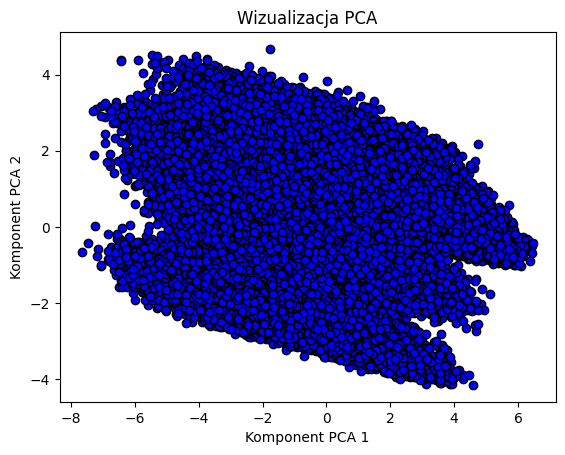

In [28]:
plt.scatter(comp_df['PCA1'], comp_df['PCA2'], color='blue', edgecolor='black')
plt.xlabel('Komponent PCA 1')
plt.ylabel('Komponent PCA 2')
plt.title('Wizualizacja PCA')
plt.show()

# Wybór algorytmów klasyfikacji.

W celu poprawnego sklasyfikowania danych została użyta metoda drzewa decyzyjnego oraz algorytm Naive Bayes.

#NAIVE BAYES

In [29]:
cols = X_train.columns


In [30]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train_bayes = scaler.fit_transform(X_train)

X_test_bayes = scaler.transform(X_test)

In [31]:
X_train_bayes = pd.DataFrame(X_train_bayes, columns=[cols])

In [32]:
X_test_bayes = pd.DataFrame(X_test_bayes, columns=[cols])

In [33]:
X_train_bayes.head()

,Gender_1,Gender_2,Customer Type_1,Customer Type_2,Age,Type of Travel_1,Type of Travel_2,Class_1,Class_2,Class_3,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,avg_rating,avg_rating_services_on_board
0,1.0,-1.0,0.0,0.0,-0.458333,1.0,-1.0,1.0,0.0,0.0,...,-0.5,-1.0,-0.5,1.0,0.5,0.5,1.000000,0.000000,0.461538,0.461538
1,0.0,0.0,0.0,0.0,0.125000,0.0,0.0,0.0,1.0,0.0,...,0.5,0.5,0.5,0.0,0.5,-0.5,0.000000,0.000000,0.384615,0.384615
2,0.0,0.0,0.0,0.0,-0.625000,1.0,-1.0,1.0,0.0,0.0,...,0.0,0.5,-0.5,1.0,-1.5,0.5,0.416667,0.000000,0.076923,0.076923
3,0.0,0.0,0.0,0.0,-0.291667,1.0,-1.0,1.0,0.0,0.0,...,-1.0,0.0,-1.5,0.0,-1.0,1.0,1.250000,1.153846,0.000000,0.000000
4,0.0,0.0,0.0,0.0,-0.125000,0.0,0.0,0.0,0.0,1.0,...,-1.5,0.5,-1.5,1.0,0.5,0.5,0.333333,0.000000,0.538462,0.538462


Powyżej został przygotowany zestaw X_train_bayes, który zostanie wykorzystany w algorytmie Naive Bayes.

In [34]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_bayes, y_train)

GaussianNB()

Zostaje przygotowany algorytm Naive Bayes

In [35]:
y_pred = gnb.predict(X_test_bayes)

y_pred

array(['neutral or dissatisfied', 'satisfied', 'neutral or dissatisfied',
       ..., 'neutral or dissatisfied', 'neutral or dissatisfied',
       'neutral or dissatisfied'], dtype='<U23')

Przewidywane wyniki działania klasyfikatora Naive Bayes

Poniżej przedstawione zostały wyniki skuteczności modelu oraz wyniki skuteczności setu treningowego.

In [36]:
from sklearn.metrics import accuracy_score

print('Skuteczność modelu wynosi: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Skuteczność modelu wynosi: 0.8566


In [37]:
y_pred_train = gnb.predict(X_train_bayes)

y_pred_train

array(['neutral or dissatisfied', 'satisfied', 'neutral or dissatisfied',
       ..., 'neutral or dissatisfied', 'satisfied',
       'neutral or dissatisfied'], dtype='<U23')

In [38]:
print('Skuteczność setu treningowego: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Skuteczność setu treningowego: 0.8568


In [39]:
print('Wynik dla setu treningowego: {:.4f}'.format(gnb.score(X_train_bayes, y_train)))

print('Wynik dla setu testowego: {:.4f}'.format(gnb.score(X_test_bayes, y_test)))

Wynik dla setu treningowego: 0.8568
Wynik dla setu testowego: 0.8566


Możemy zaobserwować, że skuteczność setu treningowego wynosi 0.8568, gdy wynik dla setu testowego wynosi 0.8566. Możemy wywnioskować poprzez zbliżenie tych wartości, że nie doszło do przeładowania modelu.

Poniżej przedstawiona została ilość wartości "satisfaction".

In [40]:
y_test.value_counts()

,count
satisfaction,
neutral or dissatisfied,14570
satisfied,11328


In [41]:
null_accuracy = (14570/(14570+11328))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.5626


Zostaje utworzona macierz, której zadaniem jest przedstawienie wydajności modelu klasyfikacyjnego.

In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Macierz modelu\n\n', cm)

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

print('\nTrue Positives(TP) = ', TP)

print('\nTrue Negatives(TN) = ', TN)

print('\nFalse Positives(FP) = ', FP)

print('\nFalse Negatives(FN) = ', FN)

Macierz modelu

 [[13006  1564]
 [ 2151  9177]]

True Positives(TP) =  13006

True Negatives(TN) =  9177

False Positives(FP) =  1564

False Negatives(FN) =  2151


Objaśnienie wyżej przedstawionych wartości:
- True Positives (TP): występuje gdy przewidujemy, że dana obserwacja należy do określonej klasy i rzeczywiście do niej należy.
- True Negatives (TN): występuje gdy przewidujemy, że dana obserwacja nie należy do określonej klasy i rzeczywiście do niej nie należy.
- False Positivies (FP): występuje gdy przewidujemy, że dana obserwacja należy do określonej klasy, ale obserwacja do niej nie należy. (Bład typu I).
- False Negatives (FN): występuje gdy przewidujemy, że dana obserwacja nie należy do określonej klasy, ale obserwacja do niej należy. (Bład typu II).


<Axes: >

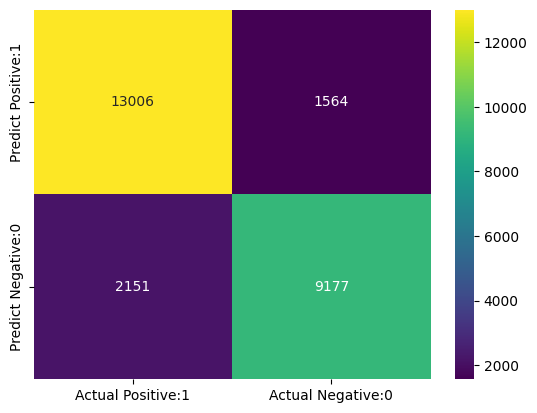

In [43]:
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='viridis')

Wizualne przedstawienie wcześniejszych wartości

Raport klasyfikacji poniżej został wykorzystany w celu przedstawienia wartości takich jak: precision, recall czy f1-score.

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.86      0.89      0.88     14570
              satisfied       0.85      0.81      0.83     11328

               accuracy                           0.86     25898
              macro avg       0.86      0.85      0.85     25898
           weighted avg       0.86      0.86      0.86     25898



In [45]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Skuteczność klasyfikacji: {0:0.4f}'.format(classification_accuracy))

Skuteczność klasyfikacji: 0.8566


In [46]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Błędy klasyfikacji: {0:0.4f}'.format(classification_error))

Błędy klasyfikacji: 0.1434


In [47]:
precision = TP / float(TP + FP)


print('Precision: {0:0.4f}'.format(precision))

Precision: 0.8927


In [48]:
recall = TP / float(TP + FN)

print('Recall: {0:0.4f}'.format(recall))

Recall: 0.8581


In [49]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate: {0:0.4f}'.format(true_positive_rate))

True Positive Rate: 0.8581


In [50]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.1456


In [51]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.8544


In [52]:
y_pred_prob = gnb.predict_proba(X_test_bayes)[0:10]

y_pred_prob

array([[9.99993017e-01, 6.98261570e-06],
       [7.53746315e-06, 9.99992463e-01],
       [1.00000000e+00, 3.76440997e-12],
       [9.99998483e-01, 1.51653342e-06],
       [9.99985435e-01, 1.45648502e-05],
       [9.99459320e-01, 5.40679735e-04],
       [9.99999833e-01, 1.66980999e-07],
       [9.99925782e-01, 7.42181642e-05],
       [1.52683764e-09, 9.99999998e-01],
       [3.16623895e-06, 9.99996834e-01]])

In [53]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - neutral or dissatisfied', 'Prob of - satisfied'])

y_pred_prob_df

,Prob of - neutral or dissatisfied,Prob of - satisfied
0,9.999930e-01,6.982616e-06
1,7.537463e-06,9.999925e-01
2,1.000000e+00,3.764410e-12
3,9.999985e-01,1.516533e-06
4,9.999854e-01,1.456485e-05
5,9.994593e-01,5.406797e-04
6,9.999998e-01,1.669810e-07
7,9.999258e-01,7.421816e-05
8,1.526838e-09,1.000000e+00
9,3.166239e-06,9.999968e-01


Powyżej zostały przedstawione wartości takie jak:
- skutecznosć klasyfikacji
- błędy klasyfikacji
- precision
- recall
- wartość True Positive
- wartość False Positive
- specyfikacja


In [54]:
gnb.predict_proba(X_test_bayes)[0:10, 1]

array([6.98261570e-06, 9.99992463e-01, 3.76440997e-12, 1.51653342e-06,
       1.45648502e-05, 5.40679735e-04, 1.66980999e-07, 7.42181642e-05,
       9.99999998e-01, 9.99996834e-01])

In [55]:
y_pred1 = gnb.predict_proba(X_test_bayes)[:, 1]

Text(0, 0.5, 'Częstotliwość')

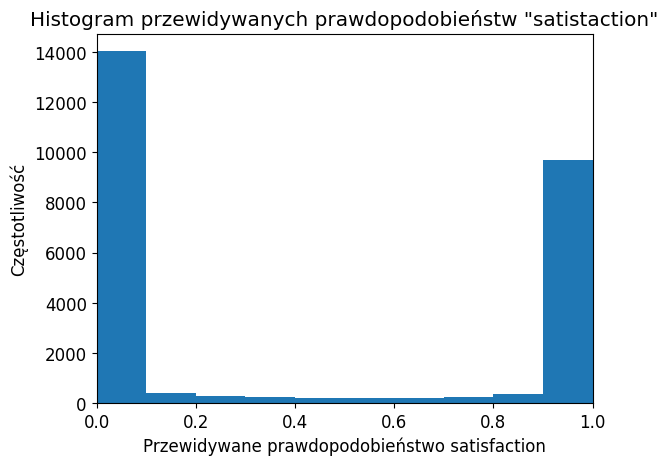

In [56]:
plt.rcParams['font.size'] = 12
plt.hist(y_pred1, bins = 10)
plt.title('Histogram przewidywanych prawdopodobieństw "satistaction"')
plt.xlim(0,1)
plt.xlabel('Przewidywane prawdopodobieństwo satisfaction')
plt.ylabel('Częstotliwość')

Z tego histogramu można odczytać, że:
- lewa kolumna zawiera około 14000 wyników wskazujących, że klient był usatysfakcjonowany,
- prawa kolumna zawiera około 10000 wyników wskazujących, że klient był nie nieusatysfakcjonowany lub był neutralny,
- kolumny pomiędzy przedstawia pozostałe wartości.

# KRZYWA ROC

Krzywa ROC wykorzystywana jest do wizualnego pomiaru wydajności modelu klasyfikacyjnego. Jest to wykres, który przedstawia wydajność modelu klasyfikacyjnego na różnych poziomach progowych klasyfikacji. Przedstawia ona "True Positive Rate" (TPR) w stosunku do "False Positive Rate (FPR).
- True Positive Rate (TPR): stosunek TP + FN
- False Positive Rate (FPR): stosunek FP + TN

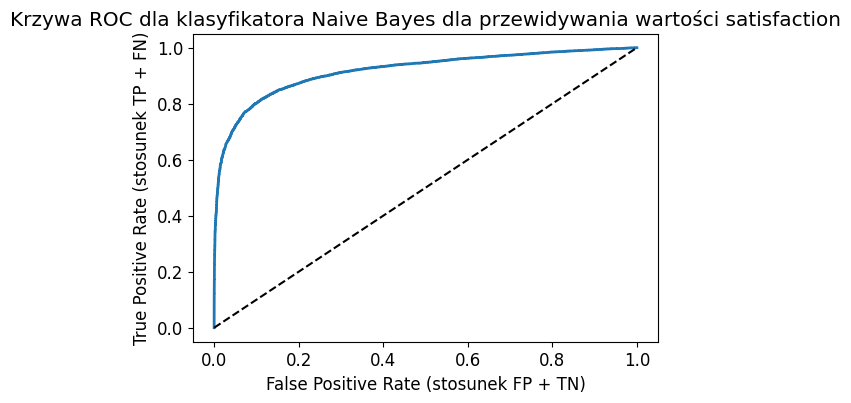

In [57]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'satisfied')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('Krzywa ROC dla klasyfikatora Naive Bayes dla przewidywania wartości satisfaction')

plt.xlabel('False Positive Rate (stosunek FP + TN)')

plt.ylabel('True Positive Rate (stosunek TP + FN)')

plt.show()

Poniżej przedstawiona została wartość ROC AUC, która odpowiada obszarowi znajdującemu się pod krzywą (procent wykresu ROC, który znajduje się pod krzywą). Jest to technika porównywania wydajności klasyfikatora.

In [ ]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9171


In [ ]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(gnb, X_train_bayes, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9183


Zaobserwować mozna, że nasza wartość zbliża się do 1, więc klasyfikator wykonuje dobrą robotę.

#K-krotna walidacja krzyżowa (k-Fold Cross Validation)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train_bayes, y_train, cv = 10, scoring='accuracy')

print('Wyniki walidacji krzyżowej (10 przykładów):{}'.format(scores))

Wyniki walidacji krzyżowej (10 przykładów):[0.85307462 0.85674293 0.8597355  0.85365383 0.85616372 0.8575152
 0.85712907 0.86137658 0.85268848 0.86030122]


Podsumowanie dokładności walidacji krzyżowej poprzez obliczenie jej średniej.

In [ ]:
print('Średni wynik walidacji krzyżowej: {:.4f}'.format(scores.mean()))

Średni wynik walidacji krzyżowej: 0.8568


#DRZEWO DECYZYJNE

Implementacja bibliotek oraz utworzenie modelu drzewa decyzyjnego.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

Głębokość drzewa:

In [ ]:
tree.tree_.max_depth

37

Poniżej przedstawione zostały dwie wartości:
- validation_prediction: prognoza dla pierwszej osoby, która pojawiła się w zbiorze X_test
- training_prediction: prognoza dla pierwszej osoby, która pojawiła się w zbiorze X_train

In [ ]:
validation_prediction = tree.predict(X_test)
training_prediction = tree.predict(X_train)

In [ ]:
print('Accuracy training set: ', accuracy_score(y_true=y_train, y_pred=training_prediction))
print('Accuracy validation set: ', accuracy_score(y_true=y_test, y_pred=validation_prediction))

Accuracy training set:  1.0
Accuracy validation set:  0.9438952814889181


Powyżej można wyczytać, że dokładność zbioru treningowego wynosi 100%, a skuteczność zbioru walidacyjnego ma dokładność. Można więc stwierdzić, że model bardzo dobrze przewiduje rejestry zbioru treningowego oraz dobrze radzi sobie ze zbiorem walidacyjnym.

Poniżej przygotowana została wizualizacja drzewa decyzyjnego

In [ ]:
!pip install graphviz

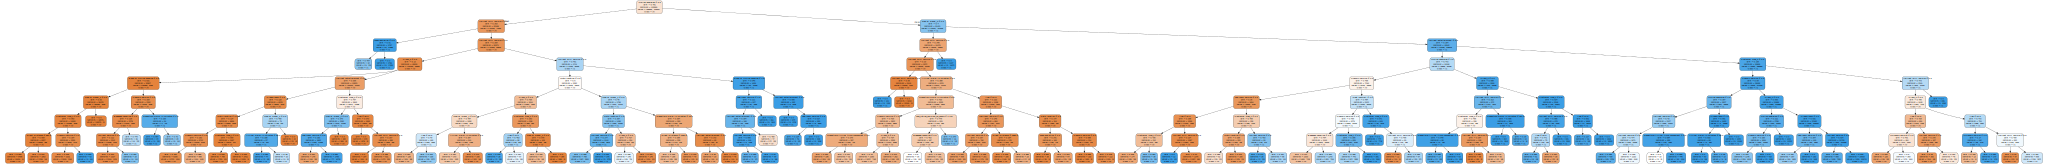

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

feature_names = X_train.columns

tree = DecisionTreeClassifier(max_depth=8, min_samples_leaf=10, min_samples_split=50)
tree.fit(X_train, y_train)

dot_data = export_graphviz(tree, out_file=None,
                         feature_names=feature_names,
                         class_names=True,
                         filled=True, rounded=True,
                         special_characters=True)

graph = graphviz.Source(dot_data)
graph

Z uwagi na duża ilość danych drzewo zostało ograniczone w taki sposób, że:
- maksykalna głębokość została ustawiona na 8,
- ilość przykładów dla każdego węzła została ustawiona na 10,
- ilość przykładów w węźle decyzyjnym została ustawiona na 50.

DRUGIE DRZEWO

Poniżej zostało utworzone drugie drzewo decyzyjne dla samych wartości określających "avg_rating"

In [ ]:
X_train_second_tree = X_train[selected_columns];
X_test_second_tree = X_test[selected_columns];

tree = DecisionTreeClassifier()
tree.fit(X_train_second_tree, y_train)

DecisionTreeClassifier()

In [ ]:
tree.tree_.max_depth

34

In [ ]:
validation_prediction = tree.predict(X_test_second_tree)
training_prediction = tree.predict(X_train_second_tree)

In [ ]:
print('Accuracy training set: ', accuracy_score(y_true=y_train, y_pred=training_prediction))
print('Accuracy validation set: ', accuracy_score(y_true=y_test, y_pred=validation_prediction))

Accuracy training set:  0.99582001950014
Accuracy validation set:  0.9283342343038072


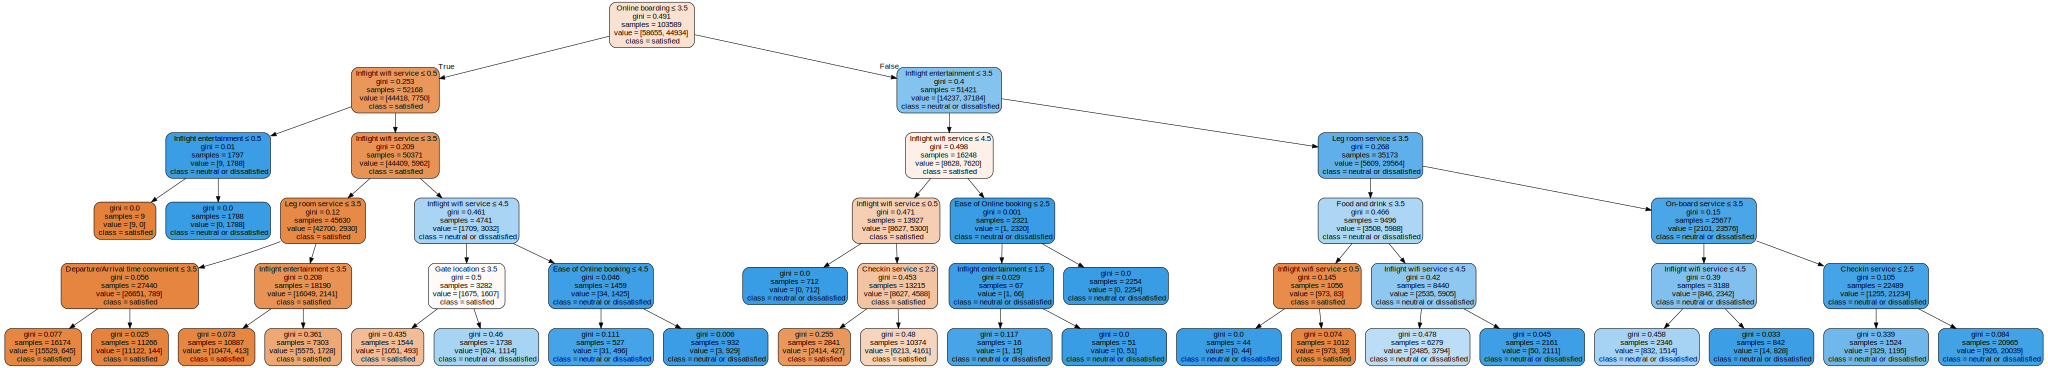

In [ ]:
feature_names = X_train_second_tree.columns

tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=20)
tree.fit(X_train_second_tree, y_train)

class_names = ['satisfied', 'neutral or dissatisfied']

dot_data = export_graphviz(tree, out_file=None,
                         feature_names=feature_names,
                         class_names=class_names,
                         filled=True, rounded=True,
                         special_characters=True)

graph = graphviz.Source(dot_data)
graph

Z uwagi na duża ilość danych drzewo zostało ograniczone w taki sposób, że:
- maksykalna głębokość została ustawiona na 5,
- ilość przykładów dla każdego węzła została ustawiona na 5,
- ilość przykładów w węźle decyzyjnym została ustawiona na 20.

#PODSUMOWANIE

- W tym projekcie mieliśmy za zadanie dokonać klasyfikacji korzystając z danych Airline Passenger Satisfaction (Kaggle) - predykcja zadowolenia klientów linii lotniczych.
- Jako cel klasyfikacji został wybrany atrybut "satisfaction", który ma dwie klasy: "satisfied" i "neutral or dissatisfied".
- Na potrzeby projektu zostały utworzone dwa nowe atrybuty: "avg_rating" i "avg_rating_services_on_board".
- Po ogólnych obróbkach danych oraz podzieleniu ich na dane testowe oraz treningowe wartości kategoryczne zostały podzielone metodą "One-Hot".
- Do selekcji atrybutów został wybrany algorytm PCA (Principal Component Analysis).
- W celu poprawnego sklasyfikowania danych została użyta metoda drzewa decyzyjnego oraz algorytm Naive Bayes.
- Dla algorytmu Naive Bayes otrzymaliśmy skuteczność na poziomie 85% (Nie doszło do przeładowania modelu).
- Po utworzeniu macierzy na bazie algorytmu Naive Bayes otrzymujemy następujące wartości w celu przedstawienia wydajności modelu klasyfikacyjnego:
 - True Positives(TP): 13006
 - True Negatives(TN): 9177
 - False Positives(FP): 1564
 - False Negatives(FN): 2151
- Po utworzeniu macierzy na bazie algorytmu Naive Bayes otrzymujemy następujące metryki:
 - Skuteczność klasyfikacji: 0.8566
 - Błędy klasyfikacji: 0.1456
 - Precision: 0.8927
 - Recall: 0.8581
 - Spicificity: 0.8544
 - True Positive Rate: 0.8581
 - False Positive Rate: 0.1456
- Wykres wartości przewidywanych prawdopodobieństw "satisfaction" można zinterpretować jako poprawny w działaniu.
- Wartość ROC AUC wynosi 0.9171 a Cross validated ROC AUC wynosi 0.9183. Z tych wyników możemy wywnioskować, że wykorzystany model jest bliski idealnemu.
- Średni wynik K-krotnej walidacji krzyżowej osiągnął wynik 0.8568 co może świadczyć o tym, że model jest niezależny od danych używanych do treningu.
- Następuje utworzenie modelu drzewa decyzyjnego, okreslenie jego głebokości oraz dokładności zbiorów walidacyjnych oraz treningowych. Z wyników dokładności zbiorów możemy wywnioskować, że model bardzo dobrze przewiduje dane ze zbioru treningowego oraz ze zbioru walidacyjnego.
- Do utworzenia pierwszego drzewa decyzyjnego wykorzystane zostały wszystkie dane, a do utworzenia drugiego drzewa decyzyjnego wykorzystane zostały konkretne dane, które składały się na parametr "avg_rating" (Średnia ocena całego przelotu)
- Wizualizacje dwóch drzew decyzyjnych oparliśmy na poniższych ograniczeniach:
 - maksymalna głębokość pierwszego drzewa została ustawiona na 8,
 - ilość przykładów pierwszego drzewa dla każdego węzła została ustawiona na 10,
 - ilość przykładów pierwszego drzewa w węźle decyzyjnym została ustawiona na 50.
 - maksymalna głębokość drugiego drzewa została ustawiona na 5,
 - ilość przykładów drugiego drzewa dla każdego węzła została ustawiona na 5,
 - ilość przykładów drugiego drzewa w węźle decyzyjnym została ustawiona na 20.

    


Jesteśmy zadowoloni z osiągniętych wyników, co poskutkowało utworzeniem dobrych oraz skutecznych modeli.